<a href="https://colab.research.google.com/github/Mint0511/PTDL-25-26/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bạn đã bao giờ tự hỏi những yếu tố nào đóng vai trò quan trọng trong việc dự đoán nguy cơ mắc bệnh tiểu đường type 2? Liệu số lần mang thai, chỉ số BMI hay tiền sử gia đình có ảnh hưởng mạnh mẽ nhất? Và điều gì sẽ xảy ra nếu chúng ta muốn dự đoán khả năng mắc bệnh của một cá nhân trong vòng 5 năm tới?**

# **Bộ dữ liệu Pima Indians Diabetes có thể giúp bạn khám phá những câu hỏi đó!**
# **Tập dữ liệu này được thu thập từ cộng đồng người Pima ở Arizona (Mỹ), vốn có tỷ lệ mắc bệnh tiểu đường type 2 cao. Nó bao gồm các thông tin y tế như số lần mang thai, nồng độ glucose trong máu, huyết áp, độ dày da, nồng độ insulin, chỉ số BMI, yếu tố di truyền tiểu đường (Diabetes Pedigree Function) và tuổi. Nhãn mục tiêu cho biết liệu bệnh nhân có phát triển bệnh tiểu đường type 2 trong vòng 5 năm hay không.**

# **Với dữ liệu này, bạn có thể khám phá và phân tích để tìm ra những yếu tố nguy cơ then chốt, so sánh ảnh hưởng của các biến số, và xây dựng các mô hình dự báo (ví dụ logistic regression, random forest, neural networks) để hỗ trợ chẩn đoán sớm và phòng ngừa bệnh tiểu đường.**

In [5]:
# Importing các thư viện Python cần thiết
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline

In [6]:
# Import thư viện google colab để kết nối với google drive (link đã đưa vào nhóm, nhớ truy cập)
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Định nghĩa tên các cột dữ liệu dựa trên file .names để dễ đọc
column_names = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
    'Outcome'
]

**Ý nghĩa từng cột dữ liệu**
- Pregnancies: số lần mang thai
- Glucose: nồng độ glucose trong máu sau khi nhịn ăn 2 giờ
- BloodPressure: huyết áp tâm thu (mm Hg)
- SkinThickness: độ dày da ở vùng tam giác vai (mm)
- Insulin: nồng độ insulin trong máu sau khi nhịn ăn (mu U/ml)
- BMI: chỉ số khối cơ thể (kg/m^2)
- DiabetesPedigreeFunction: hàm di truyền bệnh tiểu đường
- Age: tuổi (năm)
- Outcome: kết quả chẩn đoán (1: có tiểu đường, 0: không có tiểu đường)

In [8]:
# đọc dữ liệu từ file csv trong link google drive
diabetes_df = pd.read_csv("/content/drive/MyDrive/PTDL 25-26/pima-indians-diabetes.data.csv", names=column_names)           # Reading the data file

In [9]:
# Hiển thị 5 dòng đầu tiên của dataframe
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Hiển thị thông tin tổng quan về dataframe
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Tổng quan về DataFrame:**
- Bao gồm: số lượng dòng, số lượng cột, tên cột, kiểu dữ liệu của từng cột, và số lượng giá trị không null trong mỗi cột.
- RangeIndex: có 768 dòng, đánh số từ 0 đến.
- Data columns (total 9 columns): có 9 cột dữ liệu.
- dtypes: int64(8), float64(1): có 8 cột kiểu int64 và 1 cột kiểu float64
- memory usage: 54.1 KB: bộ nhớ sử dụng để lưu trữ dataframe

In [11]:
# Hiển thị các thống kê mô tả cơ bản của dataframe
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Hiển thị các thống kê mô tả cơ bản của dataframe**
- Các thống kê mô tả cơ bản bao gồm số lượng giá trị không null, trung bình, độ lệch chuẩn, giá trị min, các phần trăm vị trí (25%, 50%, 75%), và giá trị max cho mỗi cột số
- count: số lượng giá trị không null trong mỗi cột
- mean: giá trị trung bình của mỗi cột
- std: độ lệch chuẩn của mỗi cột
- min: giá trị nhỏ nhất trong mỗi cột
- 25%: giá trị tại vị trí phần trăm thứ 25 trong mỗi cột
- 50%: giá trị tại vị trí phần trăm thứ 50 (trung vị) trong mỗi cột
- 75%: giá trị tại vị trí phần trăm thứ 75 trong mỗi cột
- max: giá trị lớn nhất trong mỗi cột  
**=> Các thống kê này giúp hiểu rõ hơn về phân phối và phạm vi của dữ liệu trong mỗi cột**

Chúng ta thấy rằng tập dữ liệu có 9 cột và 768 hàng. Tất cả các cột đều có đủ 768 giá trị không rỗng, cho thấy không có giá trị thiếu (null values) rõ ràng trong tập dữ liệu.

In [12]:
# Tạo một bản sao của dataframe để tránh thay đổi dữ liệu gốc
df1 = diabetes_df.copy()

Trước hết, chúng ta sẽ cố gắng hiểu ý nghĩa của tất cả các cột trong khung dữ liệu.
Để làm được điều này, chúng ta sẽ xem xét các giá trị duy nhất đạt được bởi mỗi cột mà chúng ta không thể hiểu được ý nghĩa của chúng.

In [13]:
# Kiểm tra các giá trị duy nhất trong cột 'Pregnancies'
df1['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [14]:
# Kiểm tra các giá trị duy nhất trong cột 'Glucose'
df1['Glucose'].unique() #cột này có giá trị 0

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

In [15]:
# Kiểm tra các giá trị duy nhất trong cột 'BloodPressure'
df1['BloodPressure'].unique() # cột này có giá trị 0

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [16]:
# Kiểm tra các giá trị duy nhất trong cột 'SkinThickness'
df1['SkinThickness'].unique() #cột này có giá trị 0

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

In [17]:
# Kiểm tra các giá trị duy nhất trong cột 'Insulin'
df1['Insulin'].unique() #cột này có giá trị 0

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [18]:
# Kiểm tra các giá trị duy nhất trong cột 'BMI'
df1['BMI'].unique() # có giá tri 0

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [19]:
# Kiểm tra các giá trị duy nhất trong cột 'DiabetesPedigreeFunction'
df1['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [20]:
# Kiểm tra các giá trị duy nhất trong cột 'Age'
df1['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [21]:
# Kiểm tra các giá trị duy nhất trong cột 'Outcome'
df1['Outcome'].unique()

array([1, 0])

### **Phân tích chất lượng dữ liệu & outlier (Data Quality & Outlier Analysis)**


Có bao nhiêu giá trị 0 bất thường trong Glucose, BloodPressure, SkinThickness, Insulin?


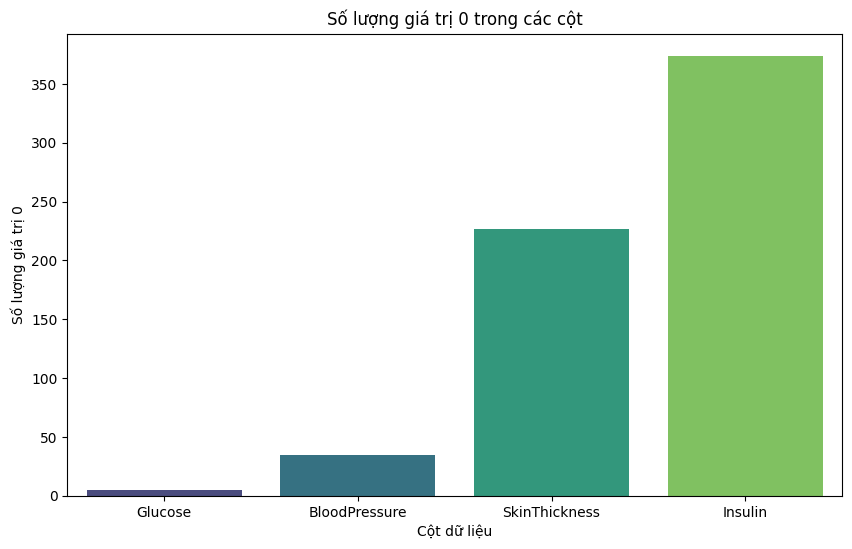

In [38]:
# Biểu đồ barchart hiển thị số lượng giá trị 0 trong các cột Glucose, BloodPressure, SkinThickness, Insulin
zero_counts = (diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']] == 0).sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=zero_counts.index, y=zero_counts.values, palette='viridis', hue=zero_counts.index, legend=False)
plt.title('Số lượng giá trị 0 trong các cột')
plt.ylabel('Số lượng giá trị 0')
plt.xlabel('Cột dữ liệu')
plt.show()

- Biểu đồ cho thấy số lượng giá trị 0 trong các cột dữ liệu quan trọng như Glucose, BloodPressure, SkinThickness và Insulin.
- Việc có nhiều giá trị 0 trong các cột này có thể ảnh hưởng đến chất lượng phân tích và mô hình hóa dữ liệu.
- Biện pháp: Xử lý giá trị 0 bằng cách thay thế chúng bằng giá trị trung vị của cột tương ứng, như đã thực hiện trong bước tiền xử lý dữ liệu.



**Clean data**

Làm sạch dữ liệu là một bước quan trọng trước khi Phân tích Khám phá Dữ liệu (EDA) vì nó sẽ loại bỏ các dữ liệu không rõ ràng có thể ảnh hưởng đến kết quả của EDA.

Trong quá trình làm sạch dữ liệu, chúng ta sẽ thực hiện các bước sau:

+ Loại bỏ các hàng trùng lặp.

+ Xử lý các giá trị bị thiếu.

+ Chuyển đổi kiểu dữ liệu của các cột cho phù hợp.

+ Thêm các cột quan trọng (nếu cần).

# **Bước 1: Loại bỏ trùng lặp**

In [22]:
# Kiểm tra trùng lặp dữ liệu trong dataframe
df1[df1.duplicated()].shape   # Kiểm tra trùng lặp

(0, 9)

Kết quả: (0, 9): 0 dòng, 9 cột  
=> Bảng dữ liệu không có dữ liệu trùng lặp

In [23]:
# Kiểm tra trùng lặp dữ liệu trong dataframe
df1[df1.duplicated()].shape   # Kiểm tra trùng lặp

(0, 9)

Bảng dữ liệu có 768 hàng và 9 cột

# **Bước 2: Xử lý các giá trị bị thiếu**

In [24]:
# Cột có giá trị thiếu
df1.isnull().sum().sort_values(ascending = False)[:6]

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


Không có giá trị thiếu trong các cột dữ liệu

Tuy nhiên. Vì các cột dữ liệu "Glucose"	"BloodPressure"	"SkinThickness"	"Insulin"	"BMI" có dữ liệu '0' được xem là dữ liệu thiếu (vì các giá trị này không thể bằng 0) nên chúng ta sẽ thay thế chúng bằng giá trị trung vị để tránh ảnh hưởng bởi các giá trị ngoại lai

- Giá trị trung vị (median) là giá trị ở giữa khi các giá trị được sắp xếp theo thứ tự  
Ví dụ: trong cột 'Glucose', nếu có các giá trị [0, 85, 90, 95, 100], giá trị trung vị là 90
- Giá trị ngoại lai (outliers) là các giá trị nằm xa so với phần lớn các giá trị khác trong tập dữ liệu  
Ví dụ: trong cột 'Insulin', nếu có các giá trị [0, 15, 20, 25, 300], giá trị 300 là một giá trị ngoại lai vì nó nằm xa so với các giá trị khác
- Việc sử dụng giá trị trung vị giúp giảm thiểu ảnh hưởng của các giá trị ngoại lai này khi thay thế các giá trị 0, giúp duy trì tính toàn vẹn của dữ liệu, tránh việc làm sai lệch các phân tích sau này

In [25]:
# Danh sách các cột có giá trị 0 cần xử lý
columns_to_process = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Duyệt qua từng cột và thay thế giá trị 0 bằng giá trị trung vị
for column in columns_to_process:
    # Lấy giá trị trung vị của cột, bỏ qua các giá trị 0
    median_value = df1[df1[column] != 0][column].median()

    # Thay thế các giá trị 0 bằng giá trị trung vị
    df1[column] = df1[column].replace(0, median_value)

In [26]:
# Kiểm tra lại các cột để đảm bảo không còn giá trị 0
print(df1[columns_to_process].describe())

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      29.108073  140.671875   32.455208
std     30.438286      12.096642       8.791221   86.383060    6.875177
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


Hàng "min" của các cột dữ liệu "Glucose" "BloodPressure" "SkinThickness" "Insulin" "BMI" đều có giá trị >0. Vì vậy các cột này đã được xử lý các dữ liệu thiếu

# **Bước 3: Chuyển đổi kiểu dữ liệu của các cột cho phù hợp.**

Sau khi kiểm tra cấu trúc dữ liệu, các kiểu dữ liệu của từng cột đã được xác định là phù hợp với nội dung của chúng (số nguyên cho các biến đếm và số thực cho các chỉ số). Do đó, không cần thực hiện bất kỳ thay đổi nào đối với kiểu dữ liệu. Bước này xác nhận rằng dữ liệu đã sẵn sàng cho quá trình phân tích tiếp theo.

# **Bước 4: Thêm các cột quan trọng.**

In [27]:
import pandas as pd

# Giả sử bạn đã tải dữ liệu vào DataFrame có tên là df

# Tạo cột phân loại BMI
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Gầy'
    elif 18.5 <= bmi < 24.9:
        return 'Bình thường'
    elif 24.9 <= bmi < 29.9:
        return 'Thừa cân'
    else:
        return 'Béo phì'

df1['BMI_Category'] = df1['BMI'].apply(classify_bmi)

# Tạo cột phân loại Glucose
def classify_glucose(glucose):
    if glucose < 110:
        return 'Bình thường'
    elif 110 <= glucose < 126:
        return 'Tiền tiểu đường'
    else:
        return 'Tiểu đường'

df1['Glucose_Category'] = df1['Glucose'].apply(classify_glucose)


# Tạo một hàm đơn giản để phân loại chỉ số DiabetesPedigreeFunction
def classify_pedigree(score):
    if score >= 0.5:
        return 'Nguy cơ cao'
    else:
        return 'Nguy cơ thấp'

# Áp dụng hàm để tạo cột mới 'Family_History'
df1['Family_History'] = df1['DiabetesPedigreeFunction'].apply(classify_pedigree)

In [28]:
# Hiển thị 5 dòng đầu tiên của dataframe
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Glucose_Category,Family_History
0,6,148,72,35,125,33.6,0.627,50,1,Béo phì,Tiểu đường,Nguy cơ cao
1,1,85,66,29,125,26.6,0.351,31,0,Thừa cân,Bình thường,Nguy cơ thấp
2,8,183,64,29,125,23.3,0.672,32,1,Bình thường,Tiểu đường,Nguy cơ cao
3,1,89,66,23,94,28.1,0.167,21,0,Thừa cân,Bình thường,Nguy cơ thấp
4,0,137,40,35,168,43.1,2.288,33,1,Béo phì,Tiểu đường,Nguy cơ cao


Việc thêm các cột phân loại như BMI_Category, Glucose_Category và Family_History giúp chúng ta chuyển đổi dữ liệu thô thành các nhóm có ý nghĩa lâm sàng. Các cột này làm nổi bật mối liên hệ giữa tình trạng cân nặng, mức đường huyết, tiền sử gia đình và nguy cơ mắc bệnh tiểu đường của bệnh nhân.

## **EDA**

**Phân tích chất lượng dữ liệu** là việc kiểm tra và đánh giá tính hợp lệ, tính đầy đủ và độ tin cậy của dữ liệu trong tập dữ liệu. Điều này bao gồm việc tìm kiếm các giá trị thiếu, giá trị nhập sai, hoặc những giá trị bất hợp lý (ví dụ: huyết áp bằng 0).

**Phân tích ngoại lai** (outlier) là việc phát hiện các giá trị nằm ngoài phạm vi bình thường của dữ liệu, có thể do lỗi nhập liệu hoặc do đặc điểm đặc biệt của đối tượng. Mục đích của phân tích này là đảm bảo dữ liệu “sạch”, đáng tin cậy và phù hợp cho các phân tích tiếp theo hoặc mô hình dự đoán.

- Đơn biến (Univariate Analysis): Kiểm tra dữ liệu từng cột để phát hiện giá trị thiếu hoặc bất hợp lý, ví dụ: số lượng giá trị 0 trong Glucose, trung bình của Insulin, hay phân phối của BMI.

- Nhị biến (Bivariate Analysis): So sánh giữa hai biến để phát hiện dấu hiệu dữ liệu bất thường, ví dụ: mối quan hệ giữa Glucose và Outcome có giá trị 0 bất thường không, hay Insulin và BMI có cùng xuất hiện giá trị cực đoan hay không.

- Đa biến (Multivariate Analysis): Xem xét nhiều biến đồng thời để phát hiện ngoại lai hoặc lỗi dữ liệu phức tạp hơn, ví dụ: một bệnh nhân có Age trẻ nhưng lại có Insulin cực cao và BMI bất thường, từ đó kiểm tra xem đây là lỗi nhập hay trường hợp đặc biệt.

#### **Đơn biến**

Q1) Xu hướng mắc bệnh tiểu đường theo từng nhóm tuổi: 20–29, 30–39, 40–49, 50+.


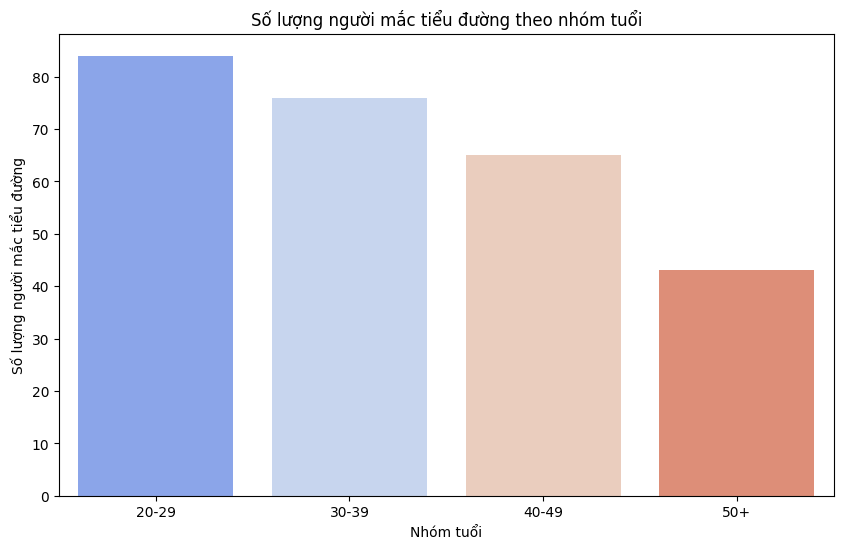

In [47]:
# Biểu đồ cột (bar chart) hiển thị số lượng người mắc tiểu đường theo từng nhóm tuổi
age_diabetes = df1[df1['Outcome'] == 1]['Age_Group'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_diabetes.index, y=age_diabetes.values, palette='coolwarm', hue=age_diabetes.index, legend=False)
plt.title('Số lượng người mắc tiểu đường theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng người mắc tiểu đường')
plt.show()
# Phân tích và ý nghĩa biểu đồ:
# Biểu đồ cho thấy đối tượng của bệnh tiểu đường đang dần trẻ hoá, đặc biệt là trong độ tuổi
# Điều này cho thấy nguy cơ mắc tiểu đường tăng theo tuổi, đặc biệt là ở những người trên 50 tuổi.

Q2) Tỷ lệ mắc bệnh theo độ tuổi kết hợp với BMI hoặc Glucose.

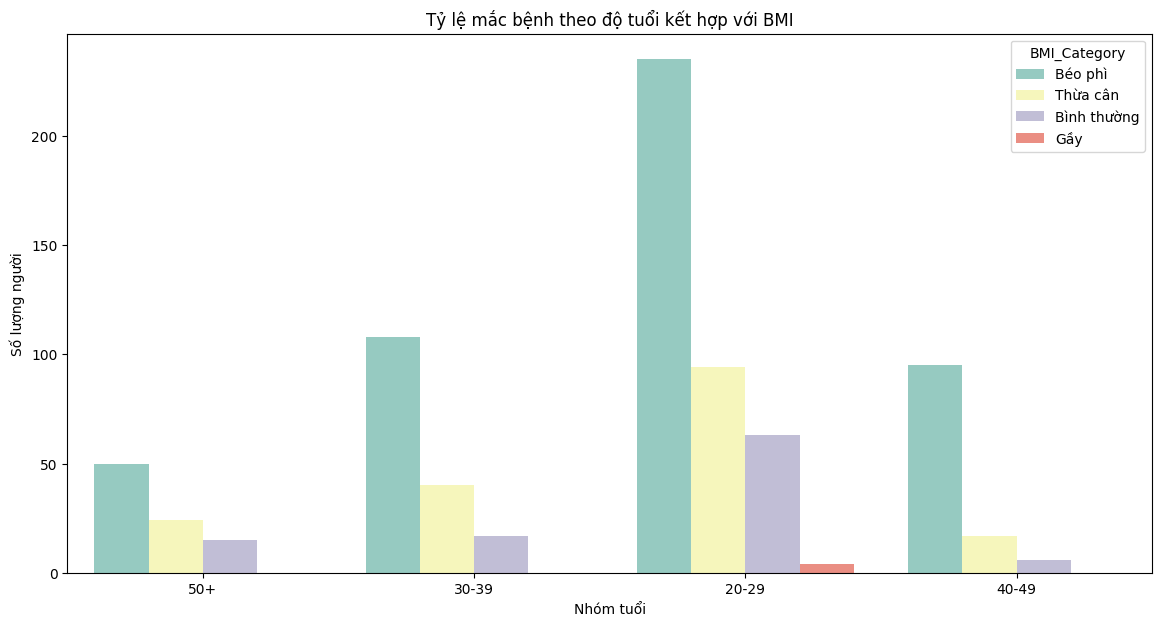

In [49]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df1, x='Age_Group', hue='BMI_Category', palette='Set3')
plt.title('Tỷ lệ mắc bệnh theo độ tuổi kết hợp với BMI')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng người')
plt.show()